In [2]:
import pandas as pd
from loguru import logger
from pathlib import Path
from tqdm import tqdm
import os
import re
import sys
import json
from mri_data import utils
import subprocess
import nibabel as nib
import numpy as np
from reload_recursive import reload_recursive
from nilearn import plotting

sys.path.insert(0, "/home/srs-9/Projects/ms_mri/analysis/thalamus/helpers")
import utils

In [3]:
reload_recursive(utils)
import utils

In [4]:
with open("/home/srs-9/Projects/ms_mri/data/subject-sessions-longit.json", 'r') as f:
    subject_sessions = json.load(f)

dataroot = Path("/mnt/h/srs-9/thalamus_project/data")
qc_root = Path("/mnt/h/srs-9/thalamus_project/qc")
all_subjects = [int(subid) for subid in list(subject_sessions.keys())]

screenshot_script = "/home/srs-9/Projects/ms_mri/analysis/thalamus/quality_control/save_screenshot.sh"
image_root = Path("/home/srs-9/Projects/ms_mri/analysis/thalamus/quality_control/images")

segmentations = [
    "choroid.nii.gz",
    "aseg-ventricles.nii.gz",
    "aseg-third_ventricle.nii.gz",
    "aseg-fourth_ventricle.nii.gz",
    "aseg-CSF.nii.gz",
    "peripheral_CSF_CHECK.nii.gz",
    "all_CSF.nii.gz"
]
all_subjects = [int(subid) for subid in list(subject_sessions.keys())]

subject_roots = {
    int(sub): dataroot / f"sub{sub}-{sessions[0]}" for sub, sessions in subject_sessions.items()
}

In [5]:
def get_ref_slice(ref_vol):
    """Returns coordinates [cor, sag, axial]

    Args:
        ref_vol (np.ndarray | tuple[np.ndarray]): 

    Returns:
        _type_: tuple[int]
    """
    if isinstance(ref_vol, np.ndarray):
        ref_x = ref_y = ref_z = ref_vol
    else:
        ref_x, ref_y, ref_z = ref_vol

    check_slice_x = 0
    n_voxels_best = 0
    for i in range(0, ref_x.shape[0]):
        ref_slice_mask = ref_x[i, :, :]
        n_voxels = np.sum(ref_slice_mask > 0)
        if  n_voxels > n_voxels_best:
            n_voxels_best = n_voxels
            check_slice_x = i


    check_slice_y = 0
    n_voxels_best = 0
    for i in range(0, ref_y.shape[1]):
        ref_slice_mask = ref_y[:, i, :]
        n_voxels = np.sum(ref_slice_mask > 0)
        if  n_voxels > n_voxels_best:
            n_voxels_best = n_voxels
            check_slice_y = i


    check_slice_z = 0
    n_voxels_best = 0
    for i in range(0, ref_z.shape[2]):
        ref_slice_mask = ref_z[:, :, i]
        n_voxels = np.sum(ref_slice_mask > 0)
        if  n_voxels > n_voxels_best:
            n_voxels_best = n_voxels
            check_slice_z = i

    return check_slice_x, check_slice_y, check_slice_z


#### Save basic sagittal view

In [ ]:
save_root = image_root / "sagittal_view_basic"
if not save_root.exists():
    os.makedirs(save_root)

failed_subs = []
for sub in all_subjects:
    sub_root = subject_roots[sub]
    # cp_seg = nib.load(sub_root/"choroid.nii.gz").get_fdata()
    # vent_seg = nib.load(sub_root/"aseg-ventricles.nii.gz").get_fdata()
    try:
        fourth_vent_seg = nib.load(sub_root/"aseg-fourth_ventricle.nii.gz").get_fdata()
        # third_vent_seg = nib.load(sub_root/"aseg-third_ventricle.nii.gz").get_fdata()

        coords = get_ref_slice(fourth_vent_seg)
    except Exception:
        failed_subs.append(sub)
        coords = (105, 120, 194)
    coord_dict = {
        "coronal": coords[0],
        "sagittal": coords[1],
        "axial": coords[2]
    }
    anat = sub_root / "t1.nii.gz"
    viewport = "sagittal"

    save_path = save_root / f"sub{sub}-anat_{utils.nifti_name(anat.name)}-{viewport}[{coord_dict[viewport]}].jpg"

    cmd = [
        screenshot_script,
        anat,
        viewport,
        save_path,
        str(coords[0]),
        str(coords[1]),
        str(coords[2])
    ]
    if not save_path.exists():
        print(sub)
        try:
            result = subprocess.run(cmd, check=True, capture_output=True)
        except subprocess.CalledProcessError:
            failed_subs.append(sub)
        if not save_path.exists():
            failed_subs.append(sub)


In [ ]:
save_root = image_root / "hips_thomas"
if not save_root.exists():
    os.makedirs(save_root)

failed_subs = []
for sub in all_subjects:
    sub_root = subject_roots[sub]
    try:
        fourth_vent_seg = nib.load(sub_root/"aseg-fourth_ventricle.nii.gz").get_fdata()
        # third_vent_seg = nib.load(sub_root/"aseg-third_ventricle.nii.gz").get_fdata()

        coords = get_ref_slice(fourth_vent_seg)
    except Exception:
        failed_subs.append(sub)
        coords = (105, 120, 194)
    coord_dict = {
        "coronal": coords[0],
        "sagittal": coords[1],
        "axial": coords[2]
    }
    anat = sub_root / "t1.nii.gz"
    viewport = "sagittal"

    save_path = save_root / f"sub{sub}-anat_{utils.nifti_name(anat.name)}-{viewport}[{coord_dict[viewport]}].jpg"

    cmd = [
        screenshot_script,
        anat,
        viewport,
        save_path,
        str(coords[0]),
        str(coords[1]),
        str(coords[2])
    ]
    if not save_path.exists():
        print(sub)
        try:
            result = subprocess.run(cmd, check=True, capture_output=True)
        except subprocess.CalledProcessError:
            failed_subs.append(sub)
        if not save_path.exists():
            failed_subs.append(sub)


In [81]:
failed_subs_prev = [1011, 1015, 1019, 1189, 1189, 1196, 1196, 1196, 1199]

In [ ]:
0.00833934
1.8

0.903984

In [86]:
sub = 1019
sub_root = subject_roots[sub]
# cp_seg = nib.load(sub_root/"choroid.nii.gz").get_fdata()
# vent_seg = nib.load(sub_root/"aseg-ventricles.nii.gz").get_fdata()
try:
    fourth_vent_seg = nib.load(sub_root/"aseg-fourth_ventricle.nii.gz").get_fdata()
    # third_vent_seg = nib.load(sub_root/"aseg-third_ventricle.nii.gz").get_fdata()

    coords = get_ref_slice(fourth_vent_seg)
except Exception:
    failed_subs.append(sub)
    coords = (105, 120, 194)
coord_dict = {
    "coronal": coords[0],
    "sagittal": coords[1],
    "axial": coords[2]
}
anat = sub_root / "t1.nii.gz"
viewport = "sagittal"

save_path = image_root / f"sub{sub}-anat_{utils.nifti_name(anat.name)}-{viewport}[{coord_dict[viewport]}].jpg"

cmd = [
    screenshot_script,
    anat,
    viewport,
    save_path,
    str(coords[0]),
    str(coords[1]),
    str(coords[2])
]
print(sub)
subprocess.run(cmd, check=True, capture_output=True)

1019


CompletedProcess(args=['/home/srs-9/Projects/ms_mri/analysis/thalamus/quality_control/save_screenshot.sh', PosixPath('/mnt/h/srs-9/thalamus_project/data/sub1019-20190608/t1.nii.gz'), 'sagittal', PosixPath('/home/srs-9/Projects/ms_mri/analysis/thalamus/quality_control/images/sub1019-anat_t1-sagittal[115].jpg'), '118', '115', '111'], returncode=0, stdout=b'/mnt/h/srs-9/thalamus_project/data/sub1019-20190608/t1.nii.gz\n', stderr=b'QStandardPaths: wrong permissions on runtime directory /home/srs-9/.xdg, 0755 instead of 0700\n')

### HIPS-THOMAS

ValueError: 'red' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'black_blue', 'black_blue_r', 'black_green', 'black_green_r', 'black_pink', 'black_pink_r', 'black_purple', 'black_purple_r', 'black_red', 'black_red_r', 'blue_orange', 'blue_orange_r', 'blue_red', 'blue_red_r', 'blue_transparent', 'blue_transparent_full_alpha_range', 'bone', 'bone_r', 'brg', 'brg_r', 'brown_blue', 'brown_blue_r', 'brown_cyan', 'brown_cyan_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cold_hot', 'cold_hot_r', 'cold_white_hot', 'cold_white_hot_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'cyan_copper', 'cyan_copper_r', 'cyan_orange', 'cyan_orange_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'green_transparent', 'green_transparent_full_alpha_range', 'grey', 'grey_r', 'hot', 'hot_black_bone', 'hot_black_bone_r', 'hot_r', 'hot_white_bone', 'hot_white_bone_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_hot', 'ocean_hot_r', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'purple_blue', 'purple_blue_r', 'purple_green', 'purple_green_r', 'rainbow', 'rainbow_r', 'red_transparent', 'red_transparent_full_alpha_range', 'roy_big_bl', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'videen_style', 'viridis', 'viridis_r', 'winter', 'winter_r'

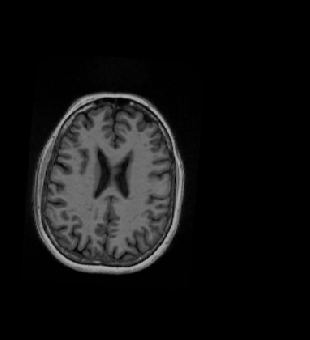

In [6]:
sub = 1001
sub_root = subject_roots[sub]

t1 = sub_root / "t1.nii.gz"
seg = sub_root / "thomasfull_R.nii.gz"

display = plotting.plot_stat_map(
   seg,
    bg_img=t1,
    display_mode='z',
    cut_coords=[25],
    cmap='red')


In [23]:
check_slice_x = 0
ref = fourth_vent_seg
n_voxels_best = 0
for i in range(0, ref.shape[0]):
    ref_slice_mask = ref[i, :, :]
    n_voxels = np.sum(ref_slice_mask > 0)
    if  n_voxels > n_voxels_best:
        n_voxels_best = n_voxels
        check_slice_x = i


check_slice_y = 0
ref = third_vent_seg
n_voxels_best = 0
for i in range(0, ref.shape[1]):
    ref_slice_mask = ref[:, i, :]
    n_voxels = np.sum(ref_slice_mask > 0)
    if  n_voxels > n_voxels_best:
        n_voxels_best = n_voxels
        check_slice_y = i


check_slice_z = 0
n_voxels_best = 0
for i in range(0, cp_seg.shape[2]):
    cp_slice_mask = cp_seg[:, :, i]
    ref_slice_mask = vent_seg[:, :, i]
    n_voxels = np.sum(ref_slice_mask > 0)
    if  n_voxels > n_voxels_best:
        n_voxels_best = n_voxels
        check_slice_z = i

print(check_slice_x, check_slice_y, check_slice_z)

105 141 194


In [20]:
np.sum(vent_slice_mask > 0)

np.int64(0)